In [ ]:
# In this file we will be studying the casualties. Specifically, the distribution of age among the casualties in the two genders.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataSet/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_cleaned = df.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 1)

df_cleaned.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [12]:
df_cleaned.isnull().sum()

Survived      0
Sex           0
Age         177
dtype: int64

In [17]:
totalCasualties = df_cleaned.loc[(df_cleaned['Survived']==0)]
totalCasualties

# Here we have the dataframe which contains only the Casualty from the shipwreck.

,Survived,Sex,Age
0,0,male,22.0
4,0,male,35.0
5,0,male,NaN
6,0,male,54.0
7,0,male,2.0
...,...,...,...
884,0,male,25.0
885,0,female,39.0
886,0,male,27.0
888,0,female,NaN


In [18]:
totalCasualties.isnull().sum()

Survived      0
Sex           0
Age         125
dtype: int64

Text(0.5, 1.0, 'Casualties among men and women')

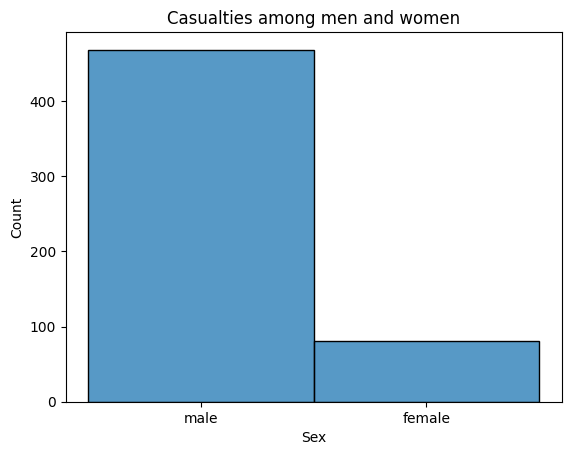

In [35]:
sns.histplot(totalCasualties['Sex'], bins = 20, stat ='count')
plt.title('Casualties among men and women')

In [21]:
maleCasualties = totalCasualties.loc[(totalCasualties['Sex']=='male')]
femaleCasualties = totalCasualties.loc[(totalCasualties['Sex']=='female')]

In [22]:
maleCasualties.isnull().sum()

Survived      0
Sex           0
Age         108
dtype: int64

Text(0.5, 1.0, 'Distribution of age among the male casualties')

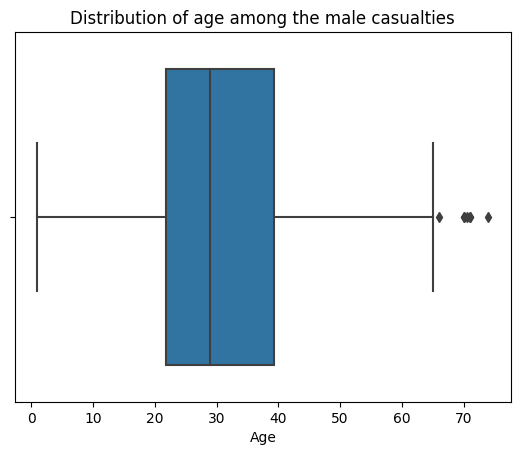

In [38]:
maleCasualtiesAge = maleCasualties['Age']

# sns.histplot(maleCasualtiesAge,stat = 'count')
# sns.displot(maleCasualtiesAge, kind = 'kde')
sns.boxplot(x = maleCasualtiesAge)
plt.title('Distribution of age among the male casualties')

In [47]:
maleAgeMean = maleCasualtiesAge.mean()
maleAgeMedian = maleCasualtiesAge.median()
maleAgeMode = maleCasualtiesAge.mode()

print(maleAgeMean)
print(maleAgeMedian)
print(maleAgeMode)


31.618055555555557
29.0
0    19.0
1    21.0
2    28.0
Name: Age, dtype: float64


In [40]:
femaleCasualties.isnull().sum()

Survived     0
Sex          0
Age         17
dtype: int64

Text(0.5, 1.0, 'Age Distribution among the female Casualties')

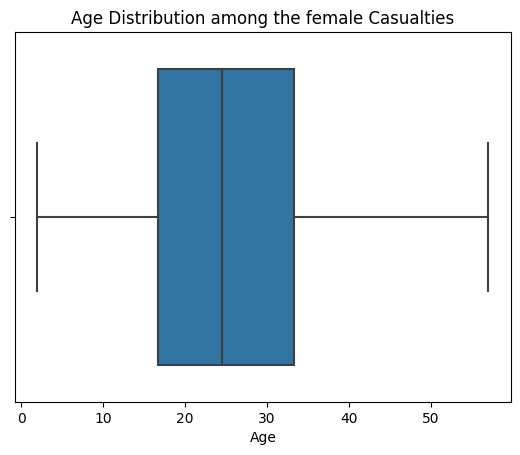

In [45]:
femaleCasualtiesAge = femaleCasualties['Age']

# sns.histplot(femaleCasualtiesAge, stat = 'count')
# sns.displot(femaleCasualtiesAge, kind ='kde')
sns.boxplot(x = femaleCasualtiesAge)
plt.title('Age Distribution among the female Casualties')

In [46]:
femaleAgeMean = femaleCasualtiesAge.mean()
femaleAgeMedian = femaleCasualtiesAge.median()
femaleAgeMode = femaleCasualtiesAge.mode()

print(femaleAgeMean)
print(femaleAgeMedian)
print(femaleAgeMode)

25.046875
24.5
0    18.0
Name: Age, dtype: float64
